# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


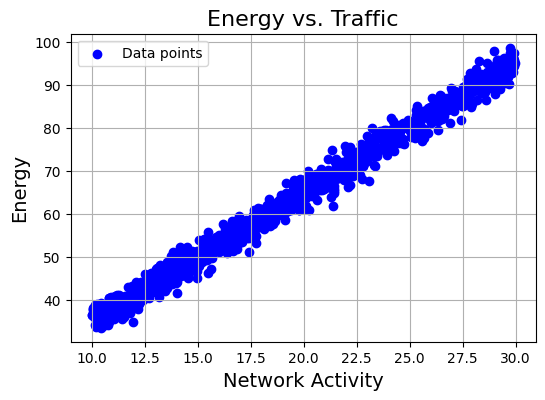

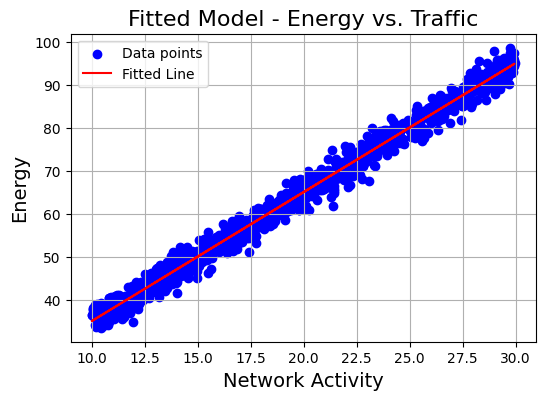

In [21]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

# henter data fra fil 
data = pd.read_csv('mission1.csv')

#Lager et plott av data 
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


#Utfører lineær regresjon
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

predictions = lr.predict(data['Net_Activity'])

#Plotter min linære modell mot oppgitt data
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, color='red', label='Fitted Line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Fitted Model - Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


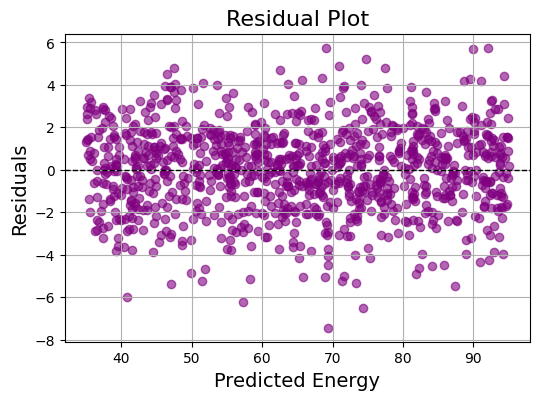

In [22]:
#Residualplott
residuals = data['Energy'] - predictions
plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, c='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.xlabel('Predicted Energy', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.show()


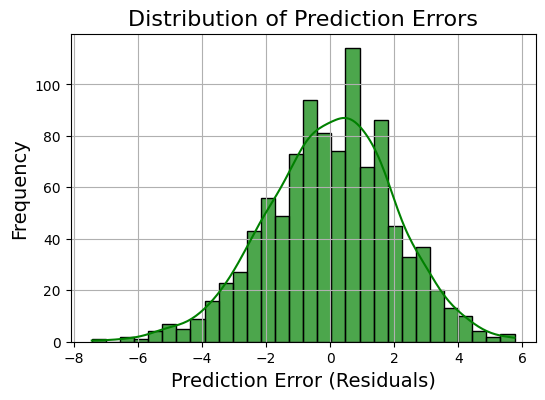

In [23]:
import seaborn as sns

#Error distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='green', alpha=0.7)
plt.xlabel('Prediction Error (Residuals)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.grid(True)
plt.show()

a. Derive the resulting Energy consumption formula.

Answer: For this mission i used the MSE (Mean Squared Error) formula as my loss function. I derived the function with respect to theta0 and theta1. This gave me the following expressions: 

- d_theta_0 = (1/m) * np.sum(y_pred - Y)
- d_theta_1 = (1/m) * np.sum((y_pred - Y) * X)

With having thousands of iterations i was able to update the systems theta values: 

- self.theta_0 -= self.learning_rate * d_theta_0
- self.theta_1 -= self.learning_rate * d_theta_1

using the learning_rate to adjust the parameters. The predicted formula i used for linear regression is: self.theta_0 + self.theta_1 * X, where self.theta_0 is the Bias, self_theta_1 is the rate of increase and X is the array with the with the values for Network activity. 

b. Analyze prediction error distribution. What is an unbiased estimator?

Anser: Observing the Residual plot, we can see the error distribution. The straight line in the middle is the ground, where the resiuals surround it. This shows how far the actual data points are from the predicted y_values as "Predicted Energy" increases. We can also observe the error distribution plot where we see the predicted error plottet against the frequency. 

An unbiased estimator is a statistical term referring to an estimator (a rule or formula used to calculate an estimate from sample data) whose expected value is equal to the true parameter it is estimating. In other words, the estimator, on average, correctly estimates the parameter. For instance: Let θ_hat be an estimator of some population parameter θ. The estimator θ_hat is unbiased if: E(θ_hat) = θ. Additionally, the same goes for Sample Mean and Sample Variance, with respect to their spesific parameters.   



## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [24]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.904
Confusion Matrix:
[[240  19]
 [ 29 212]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       259
         1.0       0.92      0.88      0.90       241

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



/var/folders/bz/0w3k54y13qx_n03vgp99ynth0000gp/T/ipykernel_81380/253850517.py:61: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Negative', marker='x', edgecolors='k')


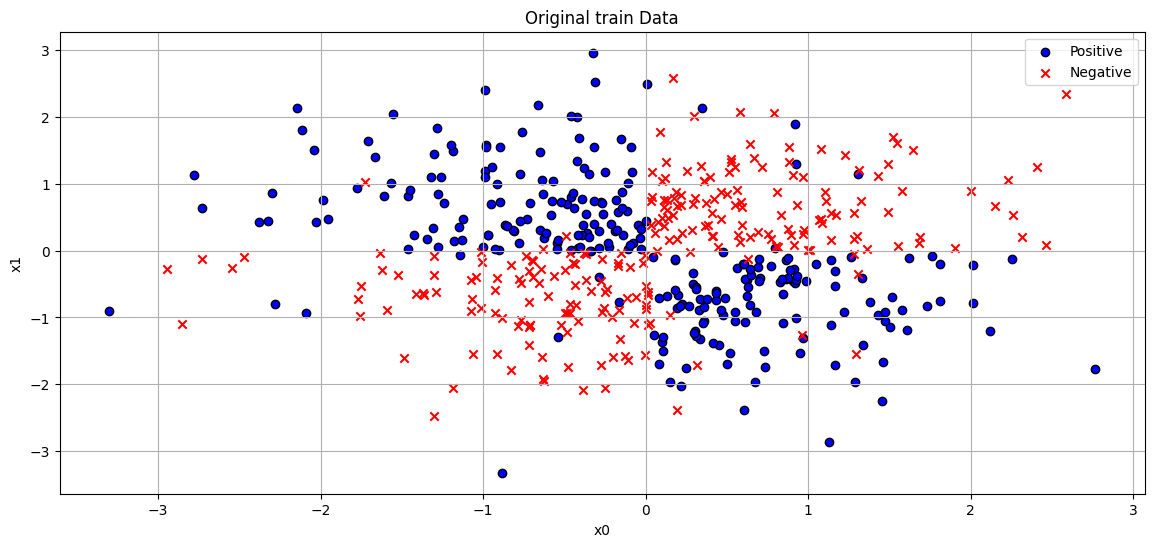

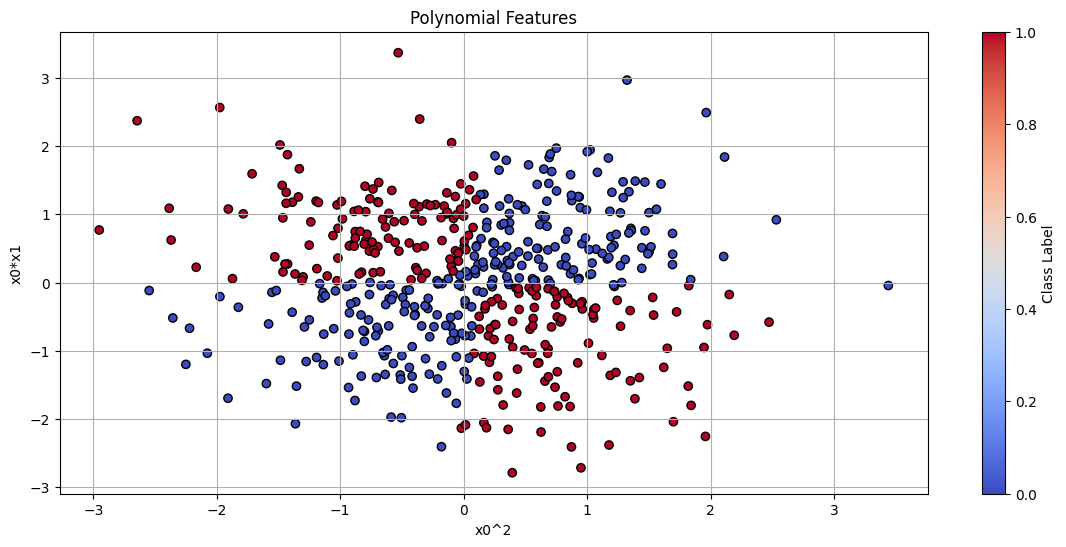

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from logistic_regression import LogisticRegressionScratch 

data = pd.read_csv('mission2.csv')

# Splitter data i trenings- og testsett basert på 'split'-kolonnen
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Ekstraherer trekk og målvariabel fra treningsdata
X_train = train[['x0', 'x1']].values
y_train = train['y'].values

# Ekstraherer trekk og målvariabel fra testdata
X_test = test[['x0', 'x1']].values
y_test = test['y'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Genererer polynomiale trekk med grad 3 
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Trener en logistisk regresjonsmodell
model = LogisticRegressionScratch()
model.fit(X_train_poly, y_train)

# Gjør prediksjoner på testsettet
y_pred = model.predict(X_test_poly)

# Evaluere modellen
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Skriver ut resultater
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



plt.figure(figsize=(14, 6))

# Plotter originale data
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Positive', marker='o', edgecolors='k')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Negative', marker='x', edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Original train Data')
plt.legend()
plt.grid(True)
plt.show()

# Plotter data med polynomiale funksjoner
# Fordeler de polynomiale funksjonene i x1 og x2 (for visualisering)
# Her bruker vi bare de første to polynomiale funksjonene for enkel visualisering
plt.figure(figsize = (14,6))
plt.scatter(X_test_poly[:, 1], X_test_poly[:, 2], c=y_pred, cmap='coolwarm', edgecolors='k', marker='o', label='Predicted')
plt.xlabel('x0^2')
plt.ylabel('x0*x1')
plt.title('Polynomial Features')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()

Accuracy: 0.874
Confusion Matrix:
[[227  32]
 [ 31 210]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       259
         1.0       0.87      0.87      0.87       241

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



/var/folders/bz/0w3k54y13qx_n03vgp99ynth0000gp/T/ipykernel_81380/2879703512.py:23: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Negative', marker='x', edgecolors='k')


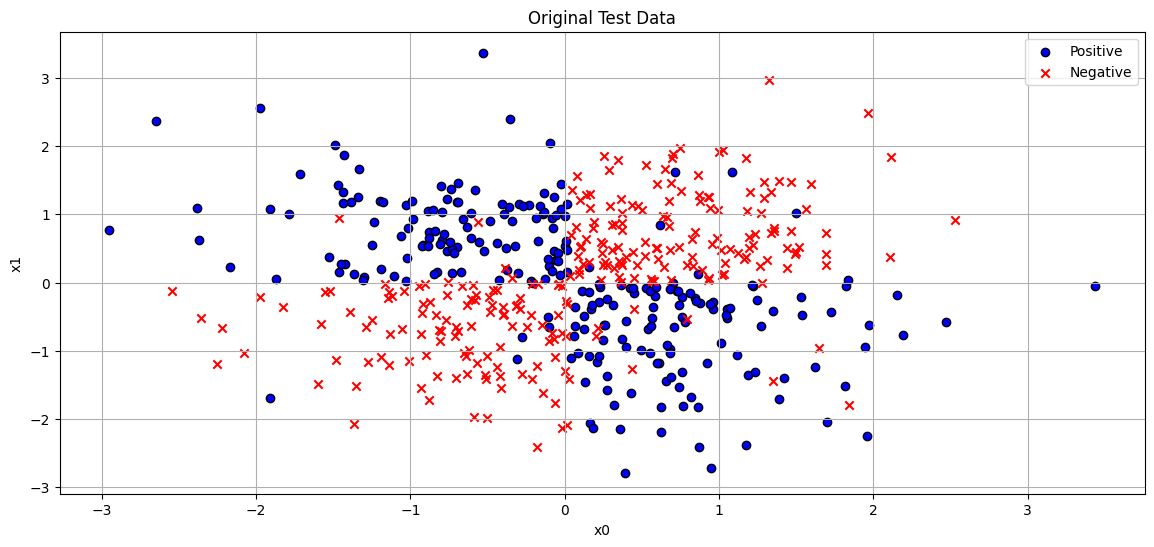

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# lager prediksjoner basert på testsettet
y_pred2 = clf.predict(X_test)

# Evaluerer modellen
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
class_report2 = classification_report(y_test, y_pred2)

# Printer resultater
print(f"Accuracy: {accuracy2}")
print("Confusion Matrix:")
print(conf_matrix2)
print("Classification Report:")
print(class_report2)

# Plotter testdata
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Positive', marker='o', edgecolors='k')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Negative', marker='x', edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Original Test Data')
plt.legend()
plt.grid(True)
plt.show()

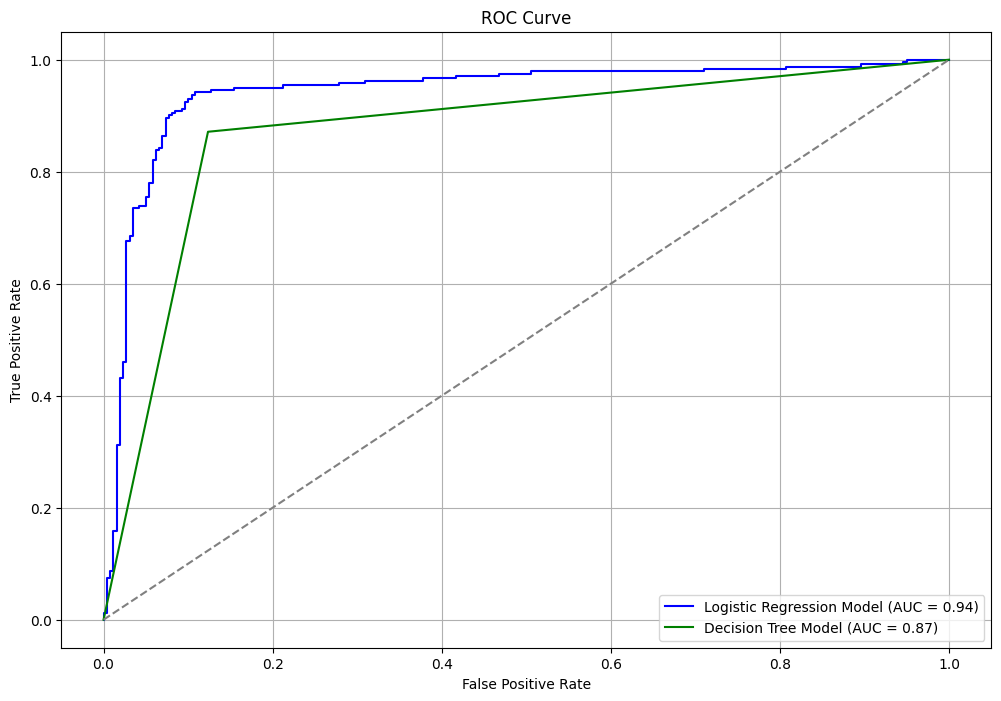

In [27]:
#Lager ROC kurve for begge metodene brukt tidligere
y_prob_model = model.predict_proba(X_test_poly)[:, 1]
y_prob_model_tree = clf.predict_proba(X_test)[:, 1]
fpr_model, tpr_model, _ = roc_curve(y_test, y_prob_model)
roc_auc_model = auc(fpr_model, tpr_model)

fpr_model_tree, tpr_model_tree, _ = roc_curve(y_test, y_prob_model_tree)
roc_auc_model_tree = auc(fpr_model_tree, tpr_model_tree)

# Ploter ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_model, tpr_model, color='blue', label=f'Logistic Regression Model (AUC = {roc_auc_model:.2f})')
plt.plot(fpr_model_tree, tpr_model_tree, color='green', label=f'Decision Tree Model (AUC = {roc_auc_model_tree:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

a. Explain poor initial performance and your improvements

Answer: Initially i used PolynomialFeatures together with Logistic Regression to approximate the accuracy, where i started with degree = 1. The accuracy was drasticly improved after changing it to "degree = 3" and also scaling the train set and the test set. 

b. What is the model's inductive bias. Why is it important?

Answer: For Linear Models (e.g., Logistic Regression) we have: 
- The inductive bias of linear models is that the relationship between the features and the target variable is linear. That is, they assume that the data can be separated by a linear boundary 
- Logistic regression assumes a log-linear relationship between the features and the log-odds of the target class.

For PolynomialFeatures: 
- When you apply polynomial transformations to the features, the inductive bias changes. Instead of assuming that the data is linearly separable, the model now assumes that the data can be separated by a polynomial decision boundary of a given degree.

In my model, I combine polynomial features with logistic regression, so the inductive bias is a combination of:

- Polynomial transformation: The assumption that the data can be described by non-linear, polynomial relationships of degree 3 (which is what i chose).

- Logistic regression: The assumption that the transformed features are linearly separable in the transformed polynomial space. Logistic regression still looks for a linear boundary, but in the higher-dimensional feature space created by the polynomial transformation.

The models inductive bias is important because it defines how well the model can generalize from the training data to unseen test data. Without the right bias, the model may fail to generalize beyond the training set and may either memorize the training data (overfitting) or oversimplify the patterns (underfitting).

c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

Answer: Using DecisionTreeClassifier as a replacement for PolynomialFeatures, we achive a slightly worse accuracy, 0.87, in comparison to 0,90 which we achieved with PolynomialFeatures. It is able to solve the problem but not as good as the combination of PolynomialFeatures and logistic regression.  

While the DecisionTreeClassifier is able to solve the problem and achieve reasonable accuracy, it performs slightly worse (0.87) than the combination of PolynomialFeatures and logistic regression (0.90). This is because:

- Polynomial features allow logistic regression to capture complex non-linear relationships in a smooth and controlled way.
- Logistic regression provides a global, smooth decision boundary that generalizes well.
- Decision trees tend to create piecewise constant, axis-aligned splits, which may not capture complex non-linear patterns as effectively.
- Overfitting is more of a concern for decision trees, especially if not properly regularized.
- Regularization in logistic regression helps avoid overfitting and leads to better generalization, while decision trees require careful tuning to      achieve similar regularization.

   
d. Plot the ROC curve

Answer: See figure above


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [28]:
file1 = pd.read_csv('mission3_train.csv')
file2 = pd.read_csv('mission3_test.csv')

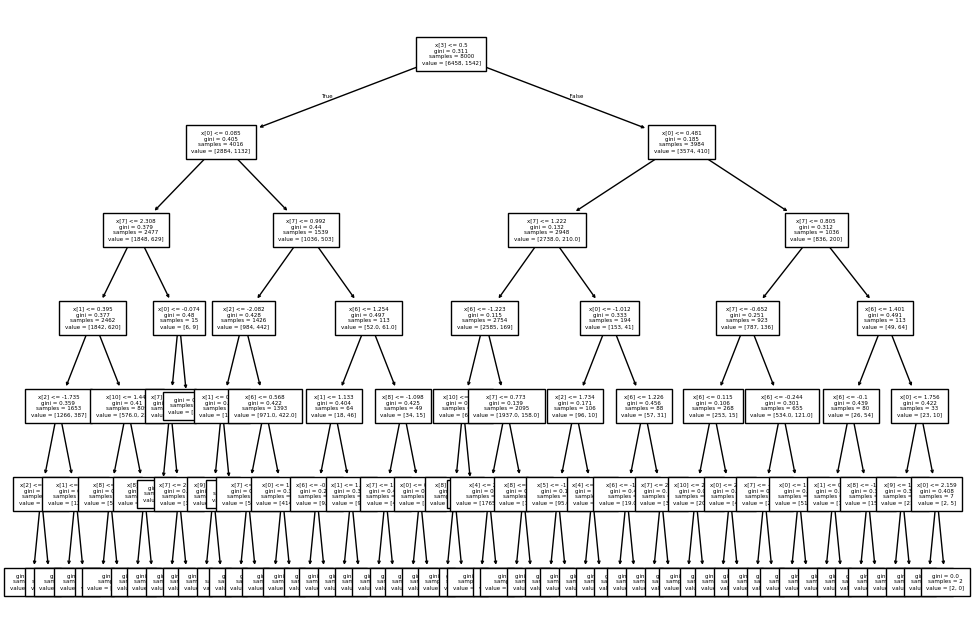

The Decision tree Accuracy is: 0.814
ROC-AUC score is: 0.7339936822235491


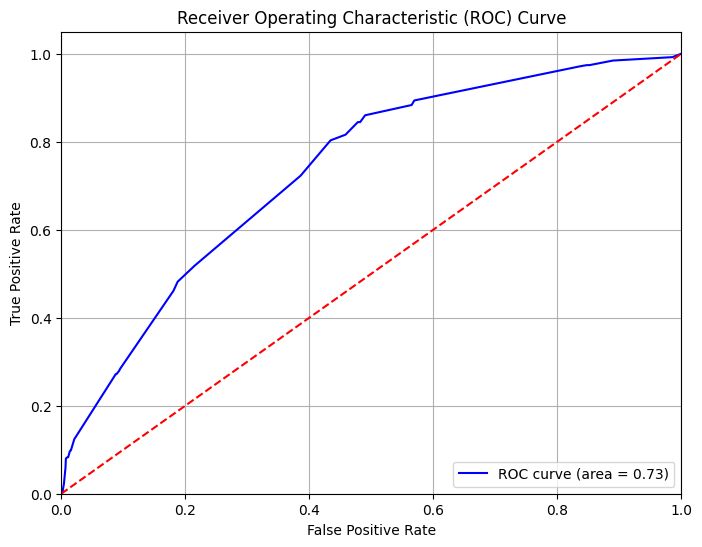

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

from logistic_regression import LogisticRegressionScratch 

train_x = file1.iloc[:, :-1].copy()
train_y = file1.iloc[:, -1].values

test_x = file2.iloc[:, :-1].copy()
test_y = file2.iloc[:, -1].values

def modify_data_stream(row): 
    if row['data_stream_3']: 
        return (row['data_stream_3']*1000).astype(int) %2
    return row['data_stream_3']

train_x['data_stream_3'] = train_x.apply(modify_data_stream, axis = 1)
test_x['data_stream_3'] = test_x.apply(modify_data_stream, axis = 1)

# Step 2: Trener DecisionTreeClassifier ved bruk av polynomial features
dtc = DecisionTreeClassifier(max_depth=6, criterion="gini")
dtc.fit(train_x, train_y)

plt.figure(figsize = (12,8))
plot_tree(dtc, fontsize = 4)
plt.show()

# Step 3: Lage prediksjoner av transformert test data
y_pred = dtc.predict(test_x)
print("The Decision tree Accuracy is:", accuracy_score(test_y, y_pred))

lg1 = LogisticRegressionScratch(learning_rate= 0.01, iterations= 10000)
lg1.fit(train_x, train_y)

# Step4: kalkulerer ROC-AUC score:
y_prob = dtc.predict_proba(test_x)[:, 1]  
fpr, tpr, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(fpr, tpr)

print('ROC-AUC score is:', roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()





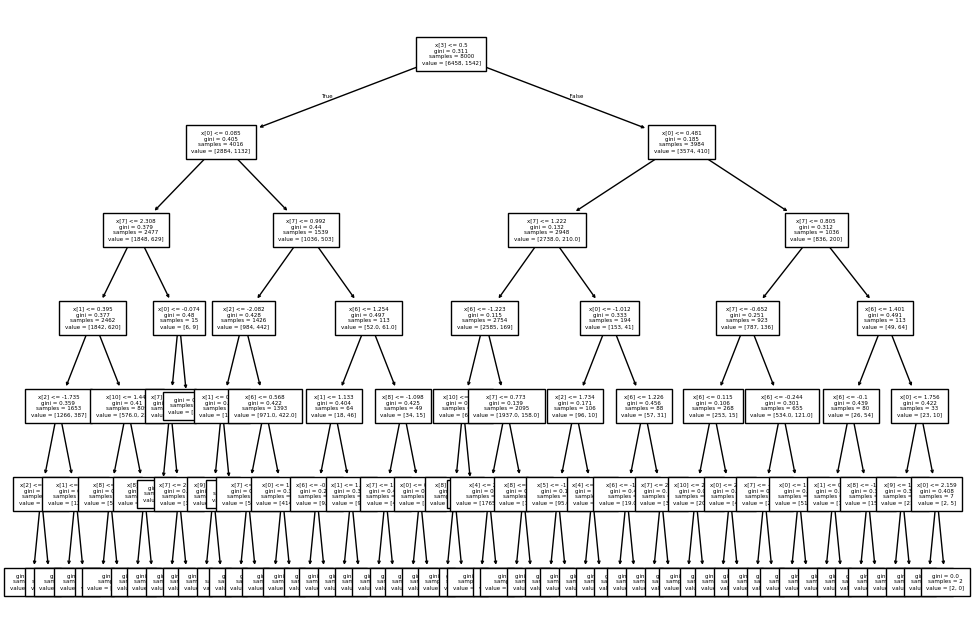

Roc score is: 0.7313757215041958


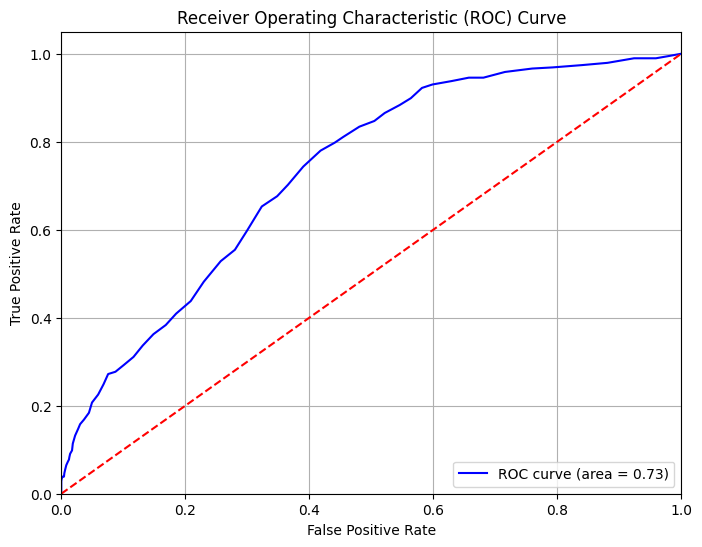

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

rfc = RandomForestClassifier(random_state = 0)
rfc.fit(train_x, train_y)

plt.figure(figsize = (12,8))
plot_tree(dtc, fontsize = 4)
plt.show()

y_prob = rfc.predict_proba(test_x)[:,1]

fpr, tpr, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(fpr, tpr)

print('Roc score is:', roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

Answer: To break the threshold i used a teqnique to tranform the datasets for both the train and test data. In detail, i changed the "data_stream_3" values by multiplying them by 1000 and taking modulo 2. This gave me a highter roc score. I also had a look at the hyperparameters, where i tried to take into account multiple parameters and change the value, but i ended up with the same/lower roc score. In the end i tried "max_depth = 6" and "criterion = gini". I used a combination of DecisionTreeClassifier and logistic regression (from mission 2). I achieved a Roc score of approximately 0.74, which was higher than the requirement of 0.72.

b. Justify ROC AUC usage

Answer: ROC-AUC stands for Receiver Operating Characteristic - Area Under the Curve. The ROC curve is a plot of the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings, and the AUC score quantifies the overall ability of the model to distinguish between positive and negative classes. AUC is defined by area under the ROC curve, which is a single scalar value summarizing the model's performance. The AUC value ranges from 0 to 1:

- AUC = 1: Perfect model.
- AUC = 0.5: Random guessing (no discrimination between classes).
- AUC < 0.5: Model performing worse than random guessing.

Since i achieved a Roc AUC of 0.74, the model it on a path to a great prediction. However, it is not perfect, nor is it random guessing. It is a place in between. 

c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

Answer: Using the same tranformation of the dataset, replacing DecisionTreeClassifier by RandomForestClassifier gave me nearly the exact same result in terms for Roc AUC. With RandomForestClassifier there was no need to use Logistic regression to help fit the data, because this would still give the same score. Both the DecisionTreeClassifier and RandomForestClassifier gave me a Roc Score of around 0.73. 







## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [32]:
train2 = train.copy()
train2['nexus_rating'] = train2.pop('nexus_rating')
train2.columns = test.columns
y = train2['nexus_rating']

Text(0, 0.5, 'Count')

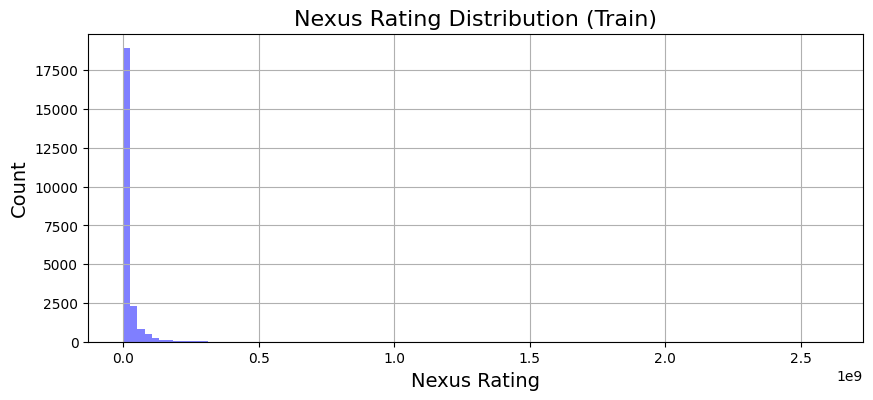

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [34]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_log_error

# Fyller inn NaN values i begge dataset med 0
train2.fillna(0, inplace=True)
test.fillna(0, inplace=True)


X = train2.copy()
X = X.drop(columns=['nexus_rating'])



# Spliter data inn i training og validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Definerer og trener the modellen
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
GB_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)

# lager en ensemble model
ensemble_model = VotingRegressor(estimators=[('rf', RF_model), ('gb', GB_model)])

# Fiter ensemble modellen
ensemble_model.fit(X_train, y_train)

# Validerer model basert på validation set
y_pred_val = ensemble_model.predict(X_val)

# Regner ut RMSLE for validation set
rmsle_val = rmsle(y_val, y_pred_val)
print('Validation RMSLE: ', rmsle_val)


X_test = test.drop(columns=['nexus_rating'])

# Lager prediksjoner basert på test set
predictions_on_testset = ensemble_model.predict(X_test)

# Passer på at vi ikke får negative prediksjoner
predictions_on_testset = np.clip(predictions_on_testset, 0, None)

# Regner ut RMSLE for test set
test_rmsle = rmsle(test['nexus_rating'], predictions_on_testset)
print('Test RMSLE: ', test_rmsle)

Validation RMSLE:  0.12797336219792507
Test RMSLE:  0.13600141892045817


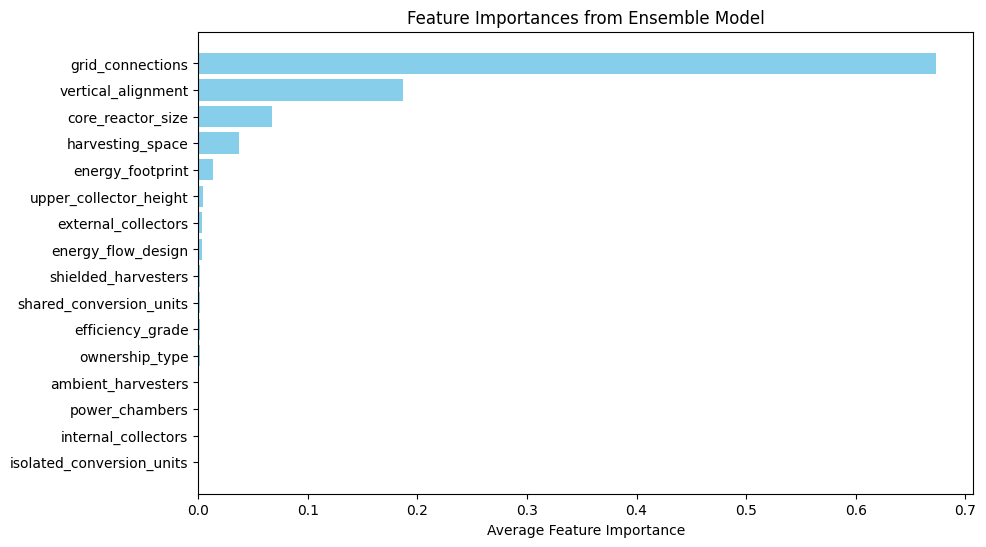

In [36]:
rf_importances = RF_model.feature_importances_
gb_importances = GB_model.feature_importances_

# Gjennomsnitt av feature importances
average_importances = (rf_importances + gb_importances) / 2

# Få feature navn fra X 
feature_names = X.columns

# Sorterer feature importances in synkende order
sorted_indices = np.argsort(average_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = average_importances[sorted_indices]

# ------------------------------
# Step 2: Plotter feature importances
# ------------------------------
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Average Feature Importance')
plt.title('Feature Importances from Ensemble Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

a. Explain your threshold-breaking strategy

Answer: My threshold breaking strategy was observing the structure of the columns in the datafiles. There seemed to be a misplacement of the columns in the train set. I saw that the nexus rating values in the train set were of similar size as the grid connection values in the test set. I therefore changed the order of the columns in the train set by popping the nexus_rating column to the end, and changing the column names in regard to the test set. Another strategy i used was to fill in values in the datasets where there were no value for the spesific feature. The values placed in the datafiles are named NaN values. Training the models using RandomForestRegressor and GradientBoostingRegressor was also crucial. 

b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

Answer: Root Mean Squared Logarithmic Error (RMSLE) is an important metric, particularly in regression tasks where the target variable can vary widely or has a skewed distribution. RMSLE penalizes underestimations more than overestimations. This is beneficial in contexts where it's more critical to predict a lower value incorrectly than to predict a higher value, such as predicting sales or prices. By taking the logarithm of the predicted and actual values, RMSLE becomes less sensitive to large differences.

The loss function: RMSLE is derived from the Mean Squared Logarithmic Error (MSLE). The RMSLE is calculated as the square root of the MSLE. 

c. Plot and interpret feature importances

Answer: See figure above. The grid_connection feature has the most importance for approximating nexus_rating. This has to do with the extremely large size of the values, compared to the other feature values in the dataset.  

d. Describe your ensembling techniques

Answer: An ensemble model combines multiple individual models to improve overall performance. In my case, the VotingRegressor is used to combine the predictions from both the RandomForestRegressor (RF_model) and the GradientBoostingRegressor (GB_model). Each model (RF and GB) makes predictions on the same data. The final prediction from the ensemble is typically the average of the predictions from the individual models (in my case of regression).

e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?

Answer: To ensure the model performs well on unseen data, I would use cross-validation to evaluate its performance on different subsets of the training data, ensuring it generalizes well. I would also monitor for overfitting by checking the model's performance on both the training and validation sets, and potentially use techniques like regularization or tuning hyperparameters
